In [4]:
pip install statsmodels

You should consider upgrading via the 'c:\users\saloni\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [7]:
df=pd.read_csv("covid_19_india.csv")

In [8]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [10]:
df['Date'].min()

'01/02/20'

In [11]:
df['Date'].max()

'31/10/20'

In [12]:
RAJ = df.loc[df['State/UnionTerritory']== 'Rajasthan']
RAJ.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
36,37,03/03/20,6:00 PM,Rajasthan,0,1,0,0,1
44,45,04/03/20,6:00 PM,Rajasthan,1,14,0,0,15
48,49,05/03/20,6:00 PM,Rajasthan,1,14,0,0,15
54,55,06/03/20,6:00 PM,Rajasthan,1,14,0,0,15
64,65,07/03/20,6:00 PM,Rajasthan,1,14,0,0,15


In [13]:
RAJ.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [15]:
RAJ.shape


(259, 9)

In [16]:
RAJ.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [17]:
cols=['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths']
RAJ['Date'] = RAJ['Date'] + ' ' + RAJ['Time']
RAJ.drop(cols,axis=1,inplace=True)
RAJ=RAJ.sort_values('Date')
RAJ.isnull().sum()

Date         0
Confirmed    0
dtype: int64

In [18]:
RAJ.head()

,Date,Confirmed
552,01/04/20 7:30 PM,93
1503,01/05/20 5:00 PM,2584
2549,01/06/20 8:00 AM,8831
3630,01/07/20 8:00 AM,18014
4733,01/08/20 8:00 AM,41298


In [19]:
RAJ.index

Int64Index([ 552, 1503, 2549, 3630, 4733, 5818, 6868, 7953,  581, 1535,
            ...
            3594, 4663, 5748, 6833, 7883,  522, 2513, 4698, 5783, 7918],
           dtype='int64', length=259)

In [20]:
len(RAJ)

259

In [24]:
RAJ=RAJ.groupby('Date')['Confirmed'].sum().reset_index()

In [25]:
RAJ=RAJ.set_index('Date')
RAJ.index=pd.to_datetime(RAJ.index)
RAJ.index

DatetimeIndex(['2020-01-04 19:30:00', '2020-01-05 17:00:00',
               '2020-01-06 08:00:00', '2020-01-07 08:00:00',
               '2020-01-08 08:00:00', '2020-01-09 08:00:00',
               '2020-01-10 08:00:00', '2020-01-11 08:00:00',
               '2020-02-04 18:00:00', '2020-02-05 17:00:00',
               ...
               '2020-06-30 08:00:00', '2020-07-30 08:00:00',
               '2020-08-30 08:00:00', '2020-09-30 08:00:00',
               '2020-10-30 08:00:00', '2020-03-31 20:30:00',
               '2020-05-31 08:00:00', '2020-07-31 08:00:00',
               '2020-08-31 08:00:00', '2020-10-31 08:00:00'],
              dtype='datetime64[ns]', name='Date', length=259, freq=None)

In [27]:
Confirm=RAJ['Confirmed'].resample('W').mean()

In [28]:
Confirm.index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29',
               '2020-12-06', '2020-12-13'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [29]:
Confirm.fillna(method='ffill',inplace=True)
Confirm['2020':]

Date
2020-01-05      1338.500000
2020-01-12     80353.500000
2020-01-19     80353.500000
2020-01-26     80353.500000
2020-02-02     80353.500000
2020-02-09     25979.166667
2020-02-16    168116.000000
2020-02-23    168116.000000
2020-03-01    168116.000000
2020-03-08     12463.166667
2020-03-15     70812.500000
2020-03-22        11.000000
2020-03-29        41.000000
2020-04-05       646.800000
2020-04-12     83995.333333
2020-04-19      1061.428571
2020-04-26      1832.285714
2020-05-03      1852.800000
2020-05-10     44451.571429
2020-05-17     37777.500000
2020-05-24      6004.571429
2020-05-31      7802.285714
2020-06-07      6739.000000
2020-06-14     85516.500000
2020-06-21     13568.857143
2020-06-28     15956.857143
2020-07-05      7710.200000
2020-07-12     87814.000000
2020-07-19     26399.857143
2020-07-26     32318.142857
2020-08-02     38082.000000
2020-08-09     25495.142857
2020-08-16     98681.666667
2020-08-23     65289.857143
2020-08-30     74674.428571
2020-09-06     

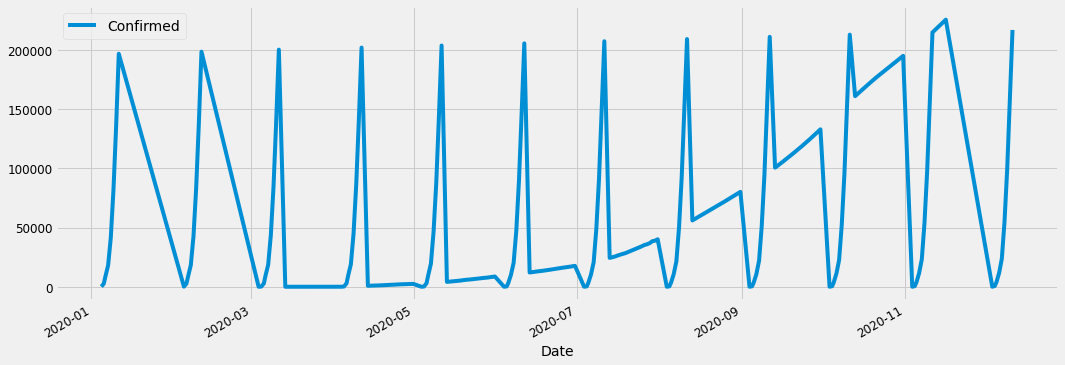

In [30]:
RAJ.plot(figsize=(16,6))
plt.show()

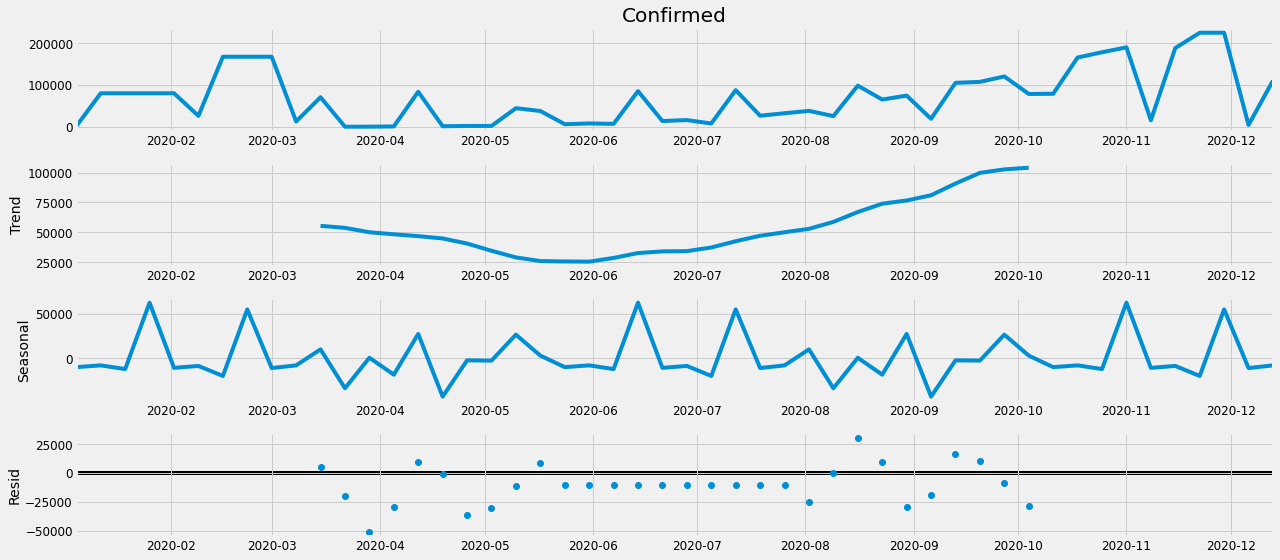

In [32]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(Confirm,freq=20,model='additive')
fig=decomposition.plot()
plt.show()

In [33]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[4],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 1, 0) X (0, 1, 0, 12)
SARIMAX: (0, 1, 1) X (0, 1, 1, 12)
SARIMAX: (1, 0, 0) X (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1103.980097703992
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:43763.459792852955
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:922.4436704596255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:618.8646961971074
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:944.5768742906811
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:43762.05057555174
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:643.4767729256979
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:620.8621810601969
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1067.077988558552
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:37224.34811978287
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:895.2079754791529
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:591.5203508921161
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:941.1343751205708
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:37092.34428626793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:641.8423159912085
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:593.0592297758634
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1062.9108755114707


c:\users\saloni\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1585.1828887032007
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:913.5061534264579
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:589.9328584572934
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:904.148948142339
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:40553.31953736329
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:618.6990806873567
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:587.2326422065366
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1041.654439341397
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:40507.58014455914
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:867.5158791968408
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:558.4501013896336
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:890.275161899973
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:40488.36072033683
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:613.0238173202332
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:556.9749124218388
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1080.8675079827658
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:39132.882021098565
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:920.2013995850941
ARIMA(1, 

c:\users\saloni\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1040.7966733552473
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:32709.01619155807
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:892.6727624379264
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:582.7847257706263
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:888.0986210746157
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:32707.878504045933
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:613.114532339993
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:585.6332988712411
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1054.2746766950859
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:21857.25837608888
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:902.8487878551616
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:588.7987334157298
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:876.9835765680264
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:18039.709723985772
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:593.7215706412876
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:586.6002216931074
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1043.6532660199457
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:21759.429327385144
ARIMA

In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1103.980097703992
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:43763.459792852955
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:922.4436704596255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:618.8646961971074
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:944.5768742906811
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:43762.05057555174
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:643.4767729256979
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:620.8621810601969
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1067.077988558552
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:37224.34811978287
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:895.2079754791529
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:591.5203508921161
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:941.1343751205708
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:37092.34428626793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:641.8423159912085
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:593.0592297758634
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1062.9108755114707


c:\users\saloni\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1585.1828887032007
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:913.5061534264579
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:589.9328584572934
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:904.148948142339
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:40553.31953736329
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:618.6990806873567
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:587.2326422065366
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1041.654439341397
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:40507.58014455914
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:867.5158791968408
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:558.4501013896336
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:890.275161899973
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:40488.36072033683
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:613.0238173202332
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:556.9749124218388
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1080.8675079827658
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:39132.882021098565
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:920.2013995850941
ARIMA(1, 

c:\users\saloni\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:892.6727624379264
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:582.7847257706263
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:888.0986210746157
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:32707.878504045933
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:613.114532339993
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:585.6332988712411
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1054.2746766950859
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:21857.25837608888
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:902.8487878551616
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:588.7987334157298
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:876.9835765680264
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:18039.709723985772
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:593.7215706412876
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:586.6002216931074
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1043.6532660199457
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:21759.429327385144
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:869.5259857798834
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:564.1008422039333
ARIMA(

In [36]:
mod=sm.tsa.statespace.SARIMAX(y,order=(1,0,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()

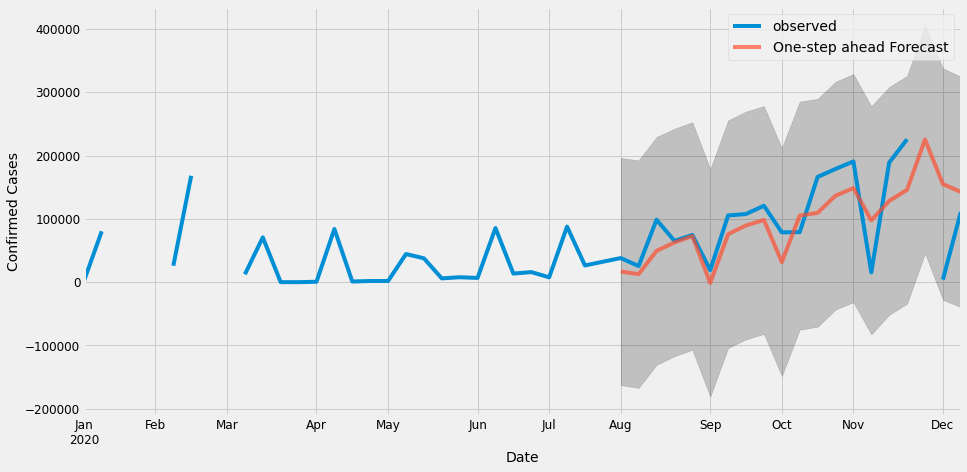

In [37]:
pred=results.get_prediction(start=pd.to_datetime('2020-08-02'),dynamic=False)
pred_ci=pred.conf_int()
ax=y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

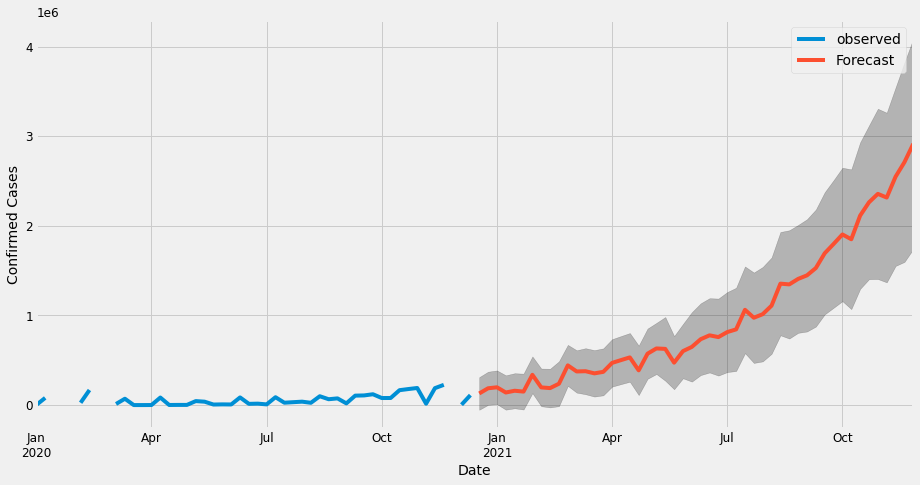

In [38]:
pred_uc=results.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax=y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()